In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import cm
import neuraltoolkit as ntk
import pandas as pd
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
import copy
#import mgktools as mgk
import musclebeachtools as mbt
#Need to add musclebeachtools to path

import spikeinterface.extractors as se
import spikeinterface.toolkit as st
import spikeinterface.sorters as ss
import spikeinterface.comparison as sc
import spikeinterface.widgets as sw
import mountainlab_pytools as mtlp

import tkinter as tk
from tkinter import filedialog

import numpy as np
import matplotlib.pyplot as plt
#%matplotlib
#import matplotlib.backends.backend_pdf as mpdf
import seaborn as sns
import json
import time
import os
import os.path as op
import glob
import re
import scipy
import sys
import boto3


%matplotlib inline
plt.rcParams.update({"text.usetex":False})

C:\Users\Ash\Anaconda3\envs\bgr\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Ash\Anaconda3\envs\bgr\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\Ash\Anaconda3\envs\bgr\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


# This needs to be adjusted/generalized

In [2]:
sys.path.append('C:\\Users\\Ash\\github\\musclebeachtools_hlab')

In [3]:
def spiketimes_to_spikewords(spiketimes, startime, stoptime, binsize, binarize): 
    ### ARGUMENTS
    #spiketimes - list of spiketime arrays where each element of list is for a different neuron (e.g. the output of getspikes())
    #startime,stoptime - bounds of time to convert to spikewords (in seconds)
    #binsize - size of bin in milliseconds
    #binarize - '1' to convert to 0's and 1's, '0' to keep as histogram counts
    ### RETURNS
    #array of spikewords with each column as a cell and each rows as time in bins 
    
    #get sec_time to bin conversion factor
    #startime in bins
    startime_ms = startime * 1000
    stoptime_ms = stoptime * 1000
    binrange = np.arange(start = startime_ms, stop = stoptime_ms+1, step = binsize)
    n_cells = len(spiketimes)

    spikewords_array = np.zeros([n_cells, binrange.shape[0]-1])
    for i in range(n_cells):
        spiketimes_cell = spiketimes[i] * 1000 #spiketimes in seconds * 1000 msec/sec
        counts, bins = np.histogram(spiketimes_cell, bins = binrange)
        if binarize == 1:
            #binarize the counts
            counts[counts>0] = 1
        # print(counts.astype(np.int))
        spikewords_array[i,:] = counts
    return(spikewords_array.astype(np.int8).T)

# List/select from s3, use boto

In [4]:
!aws --endpoint https://s3.nautilus.optiputer.net s3 ls s3://braingeneers/ephys/2020-07-06-e-MGK-76-2614-PreDrug/mgk_results/

2020-08-19 21:41:19    2060999 rasters.zip
2020-08-20 00:31:51   84538420 spikeintf_well_A1_chgroup_1.zip
2020-08-20 00:31:07   65328019 spikeintf_well_A1_chgroup_2.zip
2020-08-20 00:19:03   66966749 spikeintf_well_A1_chgroup_3.zip
2020-08-20 00:39:14   92616758 spikeintf_well_A2_chgroup_1.zip
2020-08-20 00:17:49   95908691 spikeintf_well_A2_chgroup_2.zip
2020-08-20 00:19:29   70411390 spikeintf_well_A2_chgroup_3.zip
2020-08-20 00:31:50   99927074 spikeintf_well_A2_chgroup_4.zip
2020-08-20 00:18:44  106986646 spikeintf_well_A2_chgroup_5.zip
2020-08-20 00:21:54   80408305 spikeintf_well_A2_chgroup_6.zip
2020-08-20 00:21:12   36064377 spikeintf_well_A3_chgroup_1.zip
2020-08-20 00:23:42   80976232 spikeintf_well_B1_chgroup_1.zip
2020-08-20 00:24:48  110808978 spikeintf_well_B1_chgroup_2.zip
2020-08-20 00:26:42   92682115 spikeintf_well_B1_chgroup_3.zip
2020-08-20 00:27:02   83125882 spikeintf_well_B1_chgroup_4.zip
2020-08-20 00:30:13  118010892 spikeintf_well_B1_chgroup_5.zip
2020-08-20 0

In [5]:
# import boto3

# s3 = boto3.resource('s3')
# bucket = s3.Bucket('https://braingeneers.s3.us-west-1.amazonaws.com')
# for obj in bucket.objects.all():
#     print(obj.key, obj.last_modified)

In [6]:

# session = boto3.Session(profile_name='default',config=my_config)


# s3 = session.resource('s3')
# my_bucket = s3.Bucket('braingeneers/')

# s3client = boto3.client('s3',config=my_config)

# response = s3client.list_buckets()


# print('Existing buckets:')
# for bucket in response['Buckets']:
#     print(f'  {bucket["Name"]}')

In [7]:
# s3.list_buckets()

# for my_bucket_object in my_bucket.objects.all():
#     print(my_bucket_object)

In [8]:
# for key in s3client.list_objects(Bucket='bucket_name')['Contents']:
#     print(key['Key'])

# When downloaded locally: 
Load in data

# Change wd to results dir from download

In [9]:
print(os.getcwd())
os.chdir('../../../Desktop/matt/root/data/2020-07-06-e-MGK-76-2614-PreDrug/results')
print('Changed to: ',os.getcwd())


C:\Users\Ash\github\braingeneerspy\tests
Changed to:  C:\Users\Ash\Desktop\matt\root\data\2020-07-06-e-MGK-76-2614-PreDrug\results


In [10]:
# I hate this, fix?
sys.modules['musclebeachtools_hlab'] = sys.modules['musclebeachtools']
sys.modules['musclebeachtools_hlab.musclebeachtools'] = sys.modules['musclebeachtools']

# Load in data for well A1 channel

In [11]:
well='A1ch'
c=0
n = None
for f in sorted(glob.glob(well+'*')):
    n_temp = np.load(f+'/spikeintf/outputs/neurons_group0.npy', allow_pickle=True)
    n_amp = mbt.mbt_neurons.load_spike_amplitudes(n_temp, f+'/spikeintf/outputs/amplitudes0.npy')
    
    n_prb = open(glob.glob(f+'/spikeintf/inputs/*probefile.prb')[0])
    lines = n_prb.readlines()
    real_chans = []
    s = lines[5]
    n = s.split()
    for chan in range(1,len(n)):
        #print(n[chan])
        result = re.search('c_(.*)\'', n[chan])
        real_chans.append(int(result.group(1)))
        
    for i in range(len(n_temp)):
        chan = n_temp[i].peak_channel
        #print(chan)
        n_temp[i].peak_channel = real_chans[chan]
    
    n_prb.close()
    
    if c == 0:
        nrn = n_temp
    else:
        nrn = np.append(nrn, n_temp)
    
    c = c+1
    
n = nrn

2020-11-12 11:27:45,621 - musclebeachtools_hlab.musclebeachtools.mbt_neurons - INFO - Updating spike_amplitude
2020-11-12 11:27:45,624 - musclebeachtools_hlab.musclebeachtools.mbt_neurons - INFO - Updating spike_amplitude
2020-11-12 11:27:45,628 - musclebeachtools_hlab.musclebeachtools.mbt_neurons - INFO - Updating spike_amplitude


In [12]:
n

array(['Neuron(sp_cluster, sp_times, quality, meanwaveform,meanwaveformspline, peak_channel)',
       'Neuron(sp_cluster, sp_times, quality, meanwaveform,meanwaveformspline, peak_channel)',
       'Neuron(sp_cluster, sp_times, quality, meanwaveform,meanwaveformspline, peak_channel)',
       'Neuron(sp_cluster, sp_times, quality, meanwaveform,meanwaveformspline, peak_channel)',
       'Neuron(sp_cluster, sp_times, quality, meanwaveform,meanwaveformspline, peak_channel)',
       'Neuron(sp_cluster, sp_times, quality, meanwaveform,meanwaveformspline, peak_channel)',
       'Neuron(sp_cluster, sp_times, quality, meanwaveform,meanwaveformspline, peak_channel)',
       'Neuron(sp_cluster, sp_times, quality, meanwaveform,meanwaveformspline, peak_channel)',
       'Neuron(sp_cluster, sp_times, quality, meanwaveform,meanwaveformspline, peak_channel)',
       'Neuron(sp_cluster, sp_times, quality, meanwaveform,meanwaveformspline, peak_channel)',
       'Neuron(sp_cluster, sp_times, quality, mean

In [13]:
for k in n[0].__dict__.keys():
    print(k)

clust_idx
spike_time
quality
waveform
waveforms
peak_channel
fs
start_time
end_time
waveform_tetrodes
on_times
off_times
key
cell_type
mean_amplitude
spike_amplitude


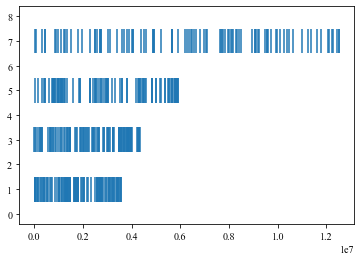

In [14]:
spikes = [n[1].spike_time,n[2].spike_time]
plt.eventplot(n[1].spike_time[:100])
plt.eventplot(n[2].spike_time[:100],lineoffsets=3)
plt.eventplot(n[3].spike_time[:100],lineoffsets=5)
plt.eventplot(n[4].spike_time[:100],lineoffsets=7)
# for i in range(100):
#     plt.eventplot(n[i].spike_time[:100],lineoffsets=i)

In [15]:
from scipy  import sparse
from scipy  import signal

from scipy.sparse import csr_matrix

In [16]:
spike_list = []
for i in range(len(n)):
    spike_list.append(n[i].spike_time)

In [17]:
from braingeneers import neuron
help(neuron)


Help on module braingeneers.neuron in braingeneers:

NAME
    braingeneers.neuron

CLASSES
    builtins.object
        Neuron
    
    class Neuron(builtins.object)
     |  Neuron(uuid, spike_sorted=True)
     |  
     |  Methods defined here:
     |  
     |  __init__(self, uuid, spike_sorted=True)
     |      Initialize self.  See help(type(self)) for accurate signature.
     |  
     |  bin_correlation(self, bins)
     |  
     |  bin_correlation_window(self, bins)
     |  
     |  load_map(self, map_arr=None)
     |  
     |  load_spike_times(self, spike_times, fs=1, window_size=10000000, max_neurons=10)
     |      Take in list of list of spike times
     |      spike_times[0] -> list of spike times for neuron 0
     |      spike_times[0][10] -> neuron zero at timestep 10
     |      
     |      outputs dense array of size (neurons, timesteps)
     |  
     |  load_spikes_test(self, neurons=10, length=1000, fs=1000)
     |  
     |  plot_correlation(self, lag_time=0)
     |  
   

In [18]:
n = neuron.Neuron('test')

In [19]:
n.load_spike_times(spike_list)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [20]:
n.spikes = n.load_spike_times(spike_list)
# n.plot_spikes()




In [21]:
from scipy.ndimage import gaussian_filter1d

In [22]:
a = n.load_spike_times(spike_list)

In [23]:
a.shape

(10, 10000000)

In [24]:
b = gaussian_filter1d(a,2,1)

n.spikes = b

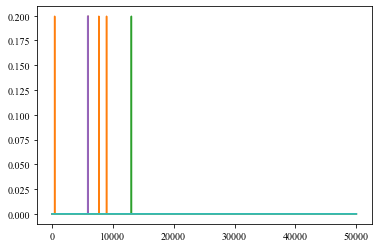

In [25]:
plt.plot(b[:,20000:70000].T)

In [29]:
print('Array takes:',sys.getsizeof(b)/1024/1024,'MB')

n.neurons = n.spikes.shape[0]

Array takes: 762.9395599365234 MB


In [30]:
corr_steps = 100

In [31]:

n.window_correlation(b,corr_steps)

In [32]:

n.corr_steps = corr_steps

n.neurons = n.spikes.shape[0]
n.bin_correlation_window(100)

In [34]:
n.corr = n.corr_w/n.corr_w.sum(axis=1)[:,np.newaxis]
n.bin_correlation(100)

C:\Users\Ash\Anaconda3\envs\bgr\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
C:\Users\Ash\Anaconda3\envs\bgr\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


ValueError: autodetected range of [nan, nan] is not finite

In [ ]:
n.plot_correlation()

In [35]:
b.shape

(10, 10000000)

In [36]:
import tensortools as tt

Fitting rank-1 models:   0%|                                | 0/4 [00:00<?, ?it/s]

(10, 10000000, 1)
(10, 10000000, 2)


C:\Users\Ash\Anaconda3\envs\bgr\lib\site-packages\tensortools\optimize\ncp_hals.py:185: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  Cp = factors[:, idx] @ grams[idx][:, p]
C:\Users\Ash\Anaconda3\envs\bgr\lib\site-packages\numba\core\typing\npydecl.py:930: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
                                                                                  

Rank-1 models:  min obj, 0.90;  max obj, 0.90;  time to fit, 178.4s


Rank-2 models:  min obj, 0.81;  max obj, 0.81;  time to fit, 736.8s


Rank-3 models:  min obj, 0.70;  max obj, 0.71;  time to fit, 711.3s


Rank-4 models:  min obj, 0.59;  max obj, 0.70;  time to fit, 1020.9s


Rank-5 models:  min obj, 0.59;  max obj, 0.64;  time to fit, 951.7s


Rank-6 models:  min obj, 0.43;  max obj, 0.52;  time to fit, 699.6s


Rank-7 models:  min obj, 0.36;  max obj, 0.52;  time to fit, 1927.6s


Rank-8 models:  min obj, 0.33;  max obj, 0.50;  time to fit, 1341.4s


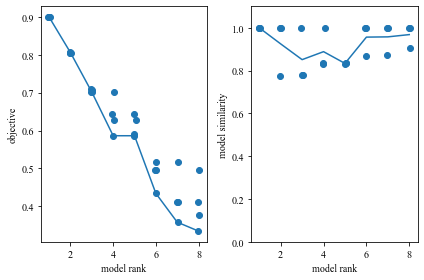

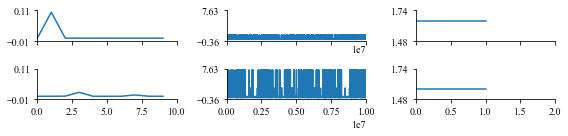

In [37]:
data = np.expand_dims(b,-1)# ... specify a numpy array holding the tensor you wish to fit
print(data.shape)
data = np.tile(data,2)
print(data.shape)

# Fit an ensemble of models, 4 random replicates / optimization runs per model rank
ensemble = tt.Ensemble(fit_method="ncp_hals")
ensemble.fit(data, ranks=range(1, 9), replicates=4)

fig, axes = plt.subplots(1, 2)
tt.plot_objective(ensemble, ax=axes[0])   # plot reconstruction error as a function of num components.
tt.plot_similarity(ensemble, ax=axes[1])  # plot model similarity as a function of num components.
fig.tight_layout()



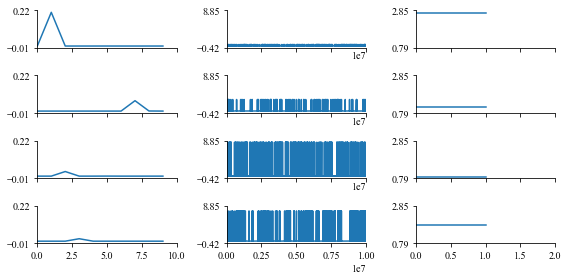

In [38]:
# Plot the low-d factors for an example model, e.g. rank-2, first optimization run / replicate.
num_components = 4
replicate = 0
tt.plot_factors(ensemble.factors(num_components)[replicate])  # plot the low-d factors

plt.show()